In [87]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
import warnings
warnings.filterwarnings('ignore')


In [29]:

df = pd.read_csv("titanic_train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family Persion,Family_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2,Duo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2,Duo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2,Duo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1,Alone


In [30]:

df.shape

(891, 11)

In [31]:

df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
Ticket              0
Fare                0
Embarked            2
Family Persion      0
Family_Type         0
dtype: int64

In [32]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Embarked        889 non-null    object 
 9   Family Persion  891 non-null    int64  
 10  Family_Type     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [33]:

df.drop(['PassengerId','Ticket','Family_Type'],axis=1,inplace=True)

In [34]:

df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family Persion
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


In [35]:

df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [36]:

df['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [38]:

df['Name'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df['Name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [39]:

sample_name = df['Name'].value_counts()
sample_name

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [40]:

sample_name[sample_name>10]

Name
Mr        517
Miss      182
Mrs       125
Master     40
Name: count, dtype: int64

In [42]:

def convert_name(text):
    if text in ['Mr','Miss','Mrs','Master']:
        return text

    else:
        return "Other name"

df['Name'] = df['Name'].apply(convert_name)
df['Name']


0              Mr
1             Mrs
2            Miss
3             Mrs
4              Mr
          ...    
886    Other name
887          Miss
888          Miss
889            Mr
890            Mr
Name: Name, Length: 891, dtype: object

In [44]:

df['Age'].fillna(df['Age'].median(),inplace=True)

In [45]:

df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<Axes: xlabel='Age', ylabel='Density'>

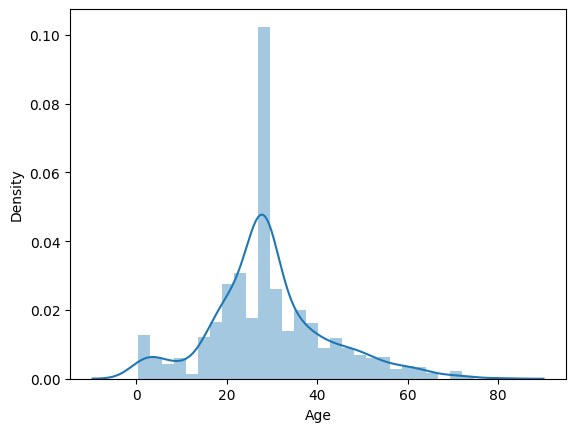

In [46]:

sns.distplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

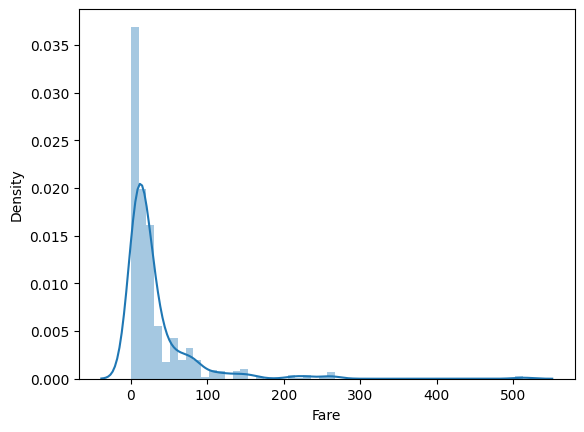

In [47]:

sns.distplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

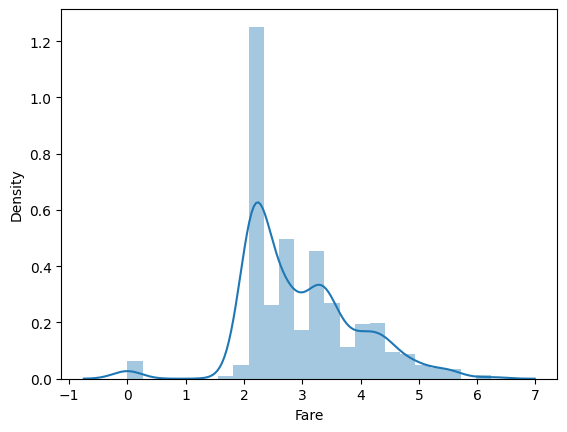

In [49]:

sns.distplot(np.log1p(df['Fare']))

In [50]:
df['Fare'] = np.log1p(df['Fare'])
df['Fare']

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

In [51]:

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [57]:

df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family Persion
0,0,3,Mr,male,22.0,2.110213,S,2
1,1,1,Mrs,female,38.0,4.280593,C,2
2,1,3,Miss,female,26.0,2.188856,S,1
3,1,1,Mrs,female,35.0,3.990834,S,2
4,0,3,Mr,male,35.0,2.202765,S,1


In [58]:

car_feature = ['Name','Sex','Embarked']
num_feature = ['Pclass','Age','Fare','Family Persion']
num_feature

['Pclass', 'Age', 'Fare', 'Family Persion']

In [61]:

df['Sex'] = df['Sex'].map({'male':1,'female':0}).astype('int')

In [62]:

df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [65]:
df2 = pd.get_dummies(df,drop_first=True)
df2.head()

,Survived,Pclass,Sex,Age,Fare,Family Persion,Name_Miss,Name_Mr,Name_Mrs,Name_Other name,Embarked_Q,Embarked_S
0,0,3,1,22.0,2.110213,2,False,True,False,False,False,True
1,1,1,0,38.0,4.280593,2,False,False,True,False,False,False
2,1,3,0,26.0,2.188856,1,True,False,False,False,False,True
3,1,1,0,35.0,3.990834,2,False,False,True,False,False,True
4,0,3,1,35.0,2.202765,1,False,True,False,False,False,True


In [67]:

df2['Name_Miss'] = df2['Name_Miss'].astype('int')
df2['Name_Mr'] = df2['Name_Mr'].astype('int')
df2['Name_Mrs'] = df2['Name_Mrs'].astype('int')
df2['Name_Other name'] = df2['Name_Other name'].astype('int')
df2['Embarked_Q'] = df2['Embarked_Q'].astype('int')
df2['Embarked_S'] = df2['Embarked_S'].astype('int')


In [71]:
df2['Pclass'] = df2['Pclass'].astype('int')


In [69]:

df2.head()

,Survived,Pclass,Sex,Age,Fare,Family Persion,Name_Miss,Name_Mr,Name_Mrs,Name_Other name,Embarked_Q,Embarked_S
0,0,3,1,22.0,2.110213,2,0,1,0,0,0,1
1,1,1,0,38.0,4.280593,2,0,0,1,0,0,0
2,1,3,0,26.0,2.188856,1,1,0,0,0,0,1
3,1,1,0,35.0,3.990834,2,0,0,1,0,0,1
4,0,3,1,35.0,2.202765,1,0,1,0,0,0,1


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int32  
 2   Sex              891 non-null    int32  
 3   Age              891 non-null    float64
 4   Fare             891 non-null    float64
 5   Family Persion   891 non-null    int64  
 6   Name_Miss        891 non-null    int32  
 7   Name_Mr          891 non-null    int32  
 8   Name_Mrs         891 non-null    int32  
 9   Name_Other name  891 non-null    int32  
 10  Embarked_Q       891 non-null    int32  
 11  Embarked_S       891 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 55.8 KB


In [76]:

from sklearn.preprocessing import LabelEncoder,StandardScaler

scaler = StandardScaler()
df2[num_feature] = scaler.fit_transform(df2[num_feature])
df2.head()

,Survived,Pclass,Sex,Age,Fare,Family Persion,Name_Miss,Name_Mr,Name_Mrs,Name_Other name,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.565736,-0.879741,0.059160,0,1,0,0,0,1
1,1,-1.566107,0,0.663861,1.361220,0.059160,0,0,1,0,0,0
2,1,0.827377,0,-0.258337,-0.798540,-0.560975,1,0,0,0,0,1
3,1,-1.566107,0,0.433312,1.062038,0.059160,0,0,1,0,0,1
4,0,0.827377,1,0.433312,-0.784179,-0.560975,0,1,0,0,0,1


In [78]:

X = df2.drop(['Survived'],axis=1)
y = df2['Survived']


In [82]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [83]:
x_train

,Pclass,Sex,Age,Fare,Family Persion,Name_Miss,Name_Mr,Name_Mrs,Name_Other name,Embarked_Q,Embarked_S
8,0.827377,0,-0.181487,-0.481456,0.679295,0,0,1,0,0,1
150,-0.369365,1,1.662909,-0.369338,-0.560975,0,0,0,1,0,1
221,-0.369365,1,-0.181487,-0.333698,-0.560975,0,1,0,0,0,1
365,0.827377,1,0.049062,-0.879741,-0.560975,0,1,0,0,0,1
324,0.827377,1,-0.104637,1.336159,5.640372,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
241,0.827377,0,-0.104637,-0.164052,0.059160,1,0,0,0,1,0
253,0.827377,1,0.049062,-0.127173,0.059160,0,1,0,0,0,1
390,-1.566107,1,0.510161,1.893172,1.299429,0,1,0,0,0,1
667,0.827377,1,-0.104637,-0.816041,-0.560975,0,1,0,0,0,1


In [84]:
y_train

8      1
150    0
221    0
365    0
324    0
      ..
241    1
253    0
390    1
667    0
843    0
Name: Survived, Length: 712, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score
random = RandomForestClassifier()
random.fit(x_train,y_train)
rand_pred = random.predict(x_test)
print(f"random_forest:{accuracy_score(y_test,rand_pred)}")

random_forest:0.7653631284916201


In [89]:
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)
decision_pred = decision.predict(x_test)
print(f"Decision_tree:{accuracy_score(y_test,rand_pred)}")

Decision_tree:0.7653631284916201


In [90]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(f"KNN:{accuracy_score(y_test,knn_pred)}")

KNN:0.7374301675977654


In [91]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train,y_train)
gradient_pred = gradient.predict(x_test)
print(f"Gradient:{accuracy_score(y_test,gradient_pred)}")

Gradient:0.776536312849162
